# EDA Notebook

This notebook contains the exploratory data analysis of the credit card fraud dataset from Kaggle.

In [2]:
# Import libraries
import pandas as pd
from matplotlib import cm
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly
import matplotlib.gridspec as gridspec

#### INSPECTING ELEMENTS OF DATASET
Inspecting the head/tail, column names, and dimensions.

In [3]:
# Load in data (transactions)
cc_transactions = pd.read_csv("../data/creditcard.csv", index_col = False, delimiter=",")

In [4]:
# Inspect the top and bottom 4 records
print(cc_transactions.tail(n = 5).T)
print(cc_transactions.head(n = 5).T)

               284802         284803         284804         284805  \
Time    172786.000000  172787.000000  172788.000000  172788.000000   
V1         -11.881118      -0.732789       1.919565      -0.240440   
V2          10.071785      -0.055080      -0.301254       0.530483   
V3          -9.834783       2.035030      -3.249640       0.702510   
V4          -2.066656      -0.738589      -0.557828       0.689799   
V5          -5.364473       0.868229       2.630515      -0.377961   
V6          -2.606837       1.058415       3.031260       0.623708   
V7          -4.918215       0.024330      -0.296827      -0.686180   
V8           7.305334       0.294869       0.708417       0.679145   
V9           1.914428       0.584800       0.432454       0.392087   
V10          4.356170      -0.975926      -0.484782      -0.399126   
V11         -1.593105      -0.150189       0.411614      -1.933849   
V12          2.711941       0.915802       0.063119      -0.962886   
V13         -0.68925

In [15]:
cc_transactions.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
# Inspect dimensions
print(cc_transactions.shape)

(284807, 31)


#### Inspecting summary statistics of the dataset.
This includes finding the multiple percentiles and inspecting these percentiles.

In [8]:
# Inspect summary statistics of dataset
print(cc_transactions.describe)
print(cc_transactions.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T)

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [26]:
fraud_or_not = cc_transactions["Class"].value_counts().tolist()

labels = ['Genuine Transactions','Fraudulent Transactions']
values = [fraud_or_not[0], fraud_or_not[1]]
colors = ['lightblue', 'lightcoral']

trace = go.Pie(labels=labels, values=values, textinfo='value',
               textfont=dict(size=20),
               marker=dict(colors=colors, line=dict(color='#000000', width=0.1)))

plotly.offline.iplot([trace], filename='styled_pie_chart')

In [9]:
# Find missing values in dataset
print(cc_transactions.isnull().values.sum())

0


There are 284315 non-fraudulent transactions and 492 fraudulent transactions. This means that 0.0017% of the transactions are fraudulent, while 0.9983% of the transactions are not fraudulent. The data are subjected to class imbalance.


Text(0, 0.5, 'Class Occurrence')

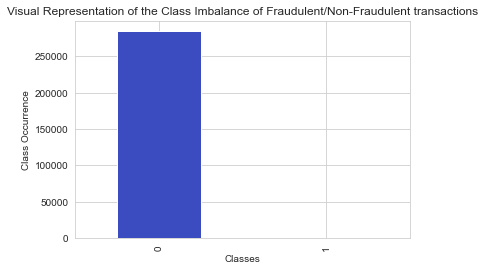

In [10]:
# Find fraudulent and non-fraudulent transactions and there respective percentages of the total transactions
non_fraudulent = (cc_transactions.Class==0).sum()
fraudulent = (cc_transactions.Class==1).sum()
records, rows = cc_transactions.shape
p_fraud = round(fraudulent / records, 4)
p_non_fraud = round(non_fraudulent / records, 4)

print(f'There are {non_fraudulent} non-fraudulent transactions and {fraudulent} fraudulent transactions. This means that {p_fraud}% of the transactions are fraudulent, while {p_non_fraud}% of the transactions are not fraudulent. The data are subjected to class imbalance.')

# Visual representation of the class imbalance
classes_viz = cc_transactions['Class'].value_counts().plot.bar(title='Visual Representation of the Class Imbalance of Fraudulent/Non-Fraudulent transactions', colormap = cm.coolwarm)
classes_viz.set_xlabel("Classes")
classes_viz.set_ylabel("Class Occurrence")

In [18]:
cc_transactions['Amount'].describe().round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

#### Distribution of the variables
Determining the distribution of the variables (e.g., Gaussian, binomial etc.)

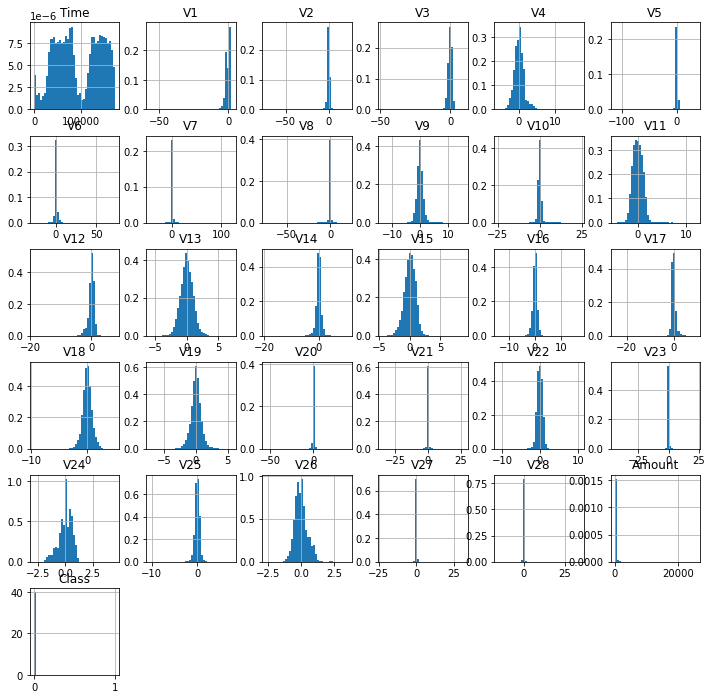

In [14]:
cc_transactions.hist(bins=40, figsize=(12,12), density=True)
plt.show()

#### CORRELATION ANALYSIS
Compute correlation accross different variables

Text(0, 0.5, 'Correlation')

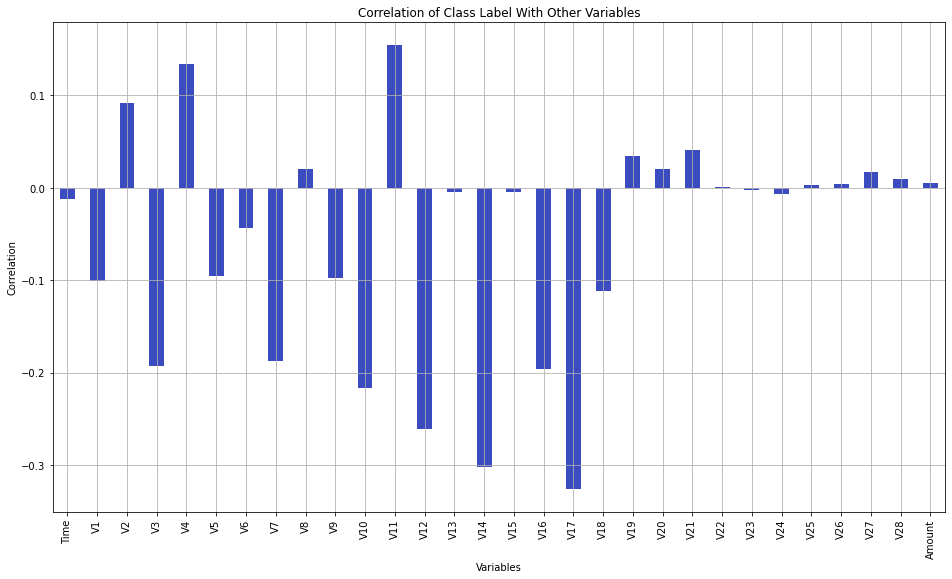

In [10]:
# Visualize correlation of class vs all other variables
# %matplotlib
cc_transactions_wo_class = cc_transactions.drop(columns='Class')
corr_viz = cc_transactions_wo_class.corrwith(cc_transactions['Class']).plot.bar(figsize=(16,9), title='Correlation of Class Label With Other Variables',grid=True, colormap = cm.coolwarm)
corr_viz.set_xlabel("Variables")
corr_viz.set_ylabel("Correlation")

In [25]:
# Calculate Pearson correlation
for variable in cc_transactions_wo_class.columns:
    corr, _ = pearsonr(cc_transactions['Class'], cc_transactions_wo_class[variable])
    print(f'Pearsons correlation of variable {variable}: %.3f' % corr)

Pearsons correlation of variable Time: -0.012
Pearsons correlation of variable V1: -0.101
Pearsons correlation of variable V2: 0.091
Pearsons correlation of variable V3: -0.193
Pearsons correlation of variable V4: 0.133
Pearsons correlation of variable V5: -0.095
Pearsons correlation of variable V6: -0.044
Pearsons correlation of variable V7: -0.187
Pearsons correlation of variable V8: 0.020
Pearsons correlation of variable V9: -0.098
Pearsons correlation of variable V10: -0.217
Pearsons correlation of variable V11: 0.155
Pearsons correlation of variable V12: -0.261
Pearsons correlation of variable V13: -0.005
Pearsons correlation of variable V14: -0.303
Pearsons correlation of variable V15: -0.004
Pearsons correlation of variable V16: -0.197
Pearsons correlation of variable V17: -0.326
Pearsons correlation of variable V18: -0.111
Pearsons correlation of variable V19: 0.035
Pearsons correlation of variable V20: 0.020
Pearsons correlation of variable V21: 0.040
Pearsons correlation of v

In [26]:
# Create heatmap to do so for all variables in heatmap
corr = cc_transactions.corr()
corr_image = corr.style.background_gradient(cmap='coolwarm').set_precision(4).set_properties(**{'font-size': '4pt'})
corr_image

/var/folders/35/9z_r08md09j_b9z46b8xdlnh0000gn/T/ipykernel_1865/377044375.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_image = corr.style.background_gradient(cmap='coolwarm').set_precision(4).set_properties(**{'font-size': '4pt'})


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.0000,0.1174,-0.0106,-0.4196,-0.1053,0.1731,-0.0630,0.0847,-0.0369,-0.0087,0.0306,-0.2477,0.1243,-0.0659,-0.0988,-0.1835,0.0119,-0.0733,0.0904,0.0290,-0.0509,0.0447,0.1441,0.0511,-0.0162,-0.2331,-0.0414,-0.0051,-0.0094,-0.0106,-0.0123
V1,0.1174,1.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.2277,-0.1013
V2,-0.0106,0.0000,1.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.5314,0.0913
V3,-0.4196,-0.0000,0.0000,1.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.2109,-0.1930
V4,-0.1053,-0.0000,-0.0000,0.0000,1.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0987,0.1334
V5,0.1731,0.0000,0.0000,-0.0000,-0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.3864,-0.0950
V6,-0.0630,-0.0000,0.0000,0.0000,-0.0000,0.0000,1.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.2160,-0.0436
V7,0.0847,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.3973,-0.1873
V8,-0.0369,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,1.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.1031,0.0199
V9,-0.0087,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0442,-0.0977


In [57]:
# Overview of correlation of variables
corr.round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


#### Outlier Analysis
Are there outlier that need to be taken into account?
The data seems to contain many outliers. This can be seen as problematic when applying active learning, namely uncertainty sampling. It is going to be biased towards those outliers in particular.

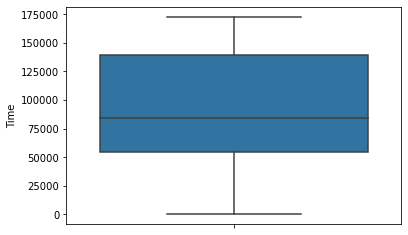

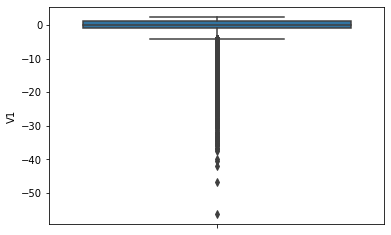

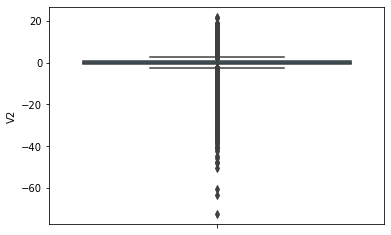

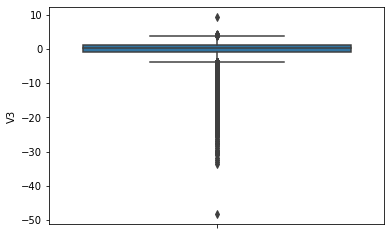

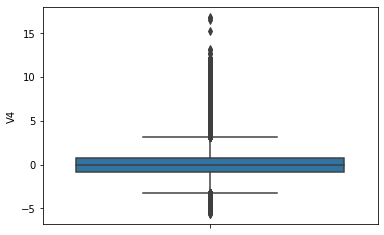

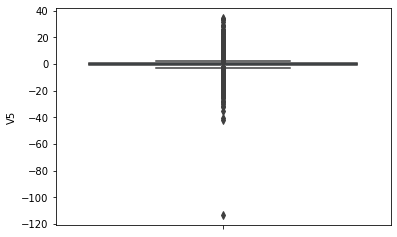

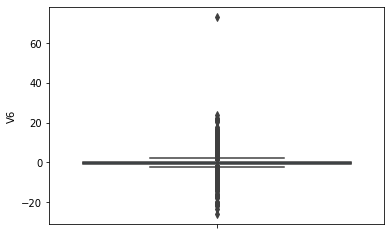

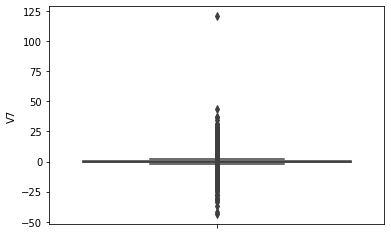

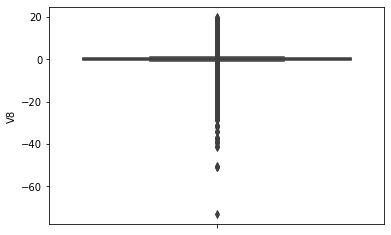

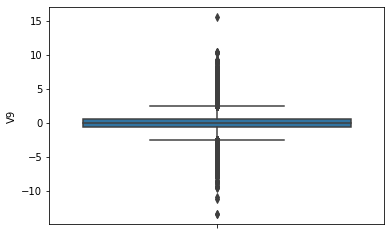

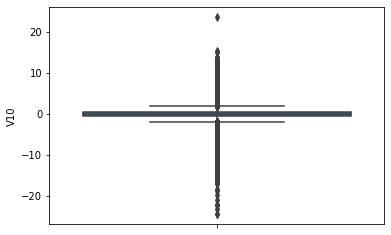

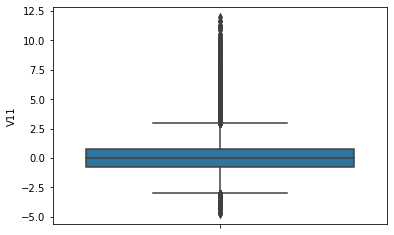

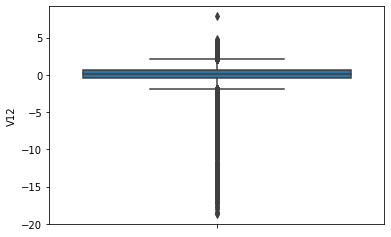

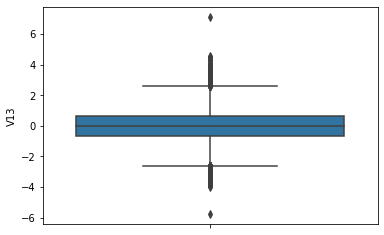

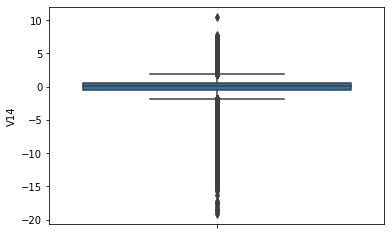

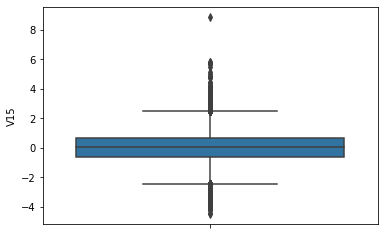

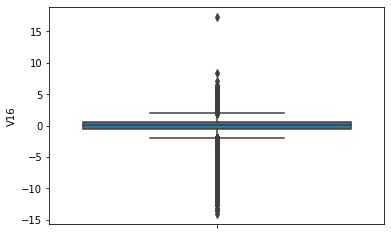

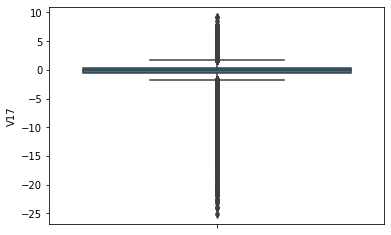

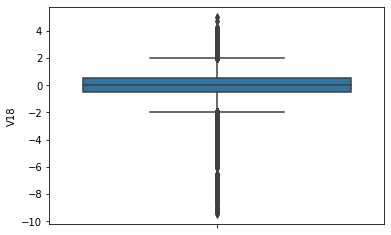

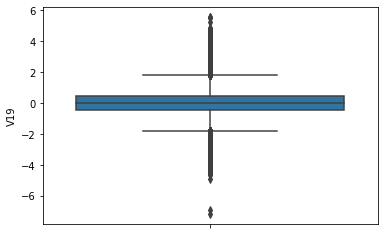

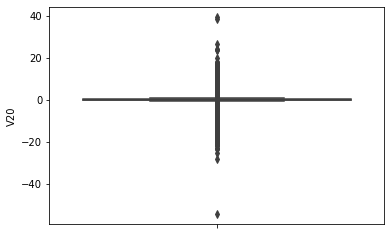

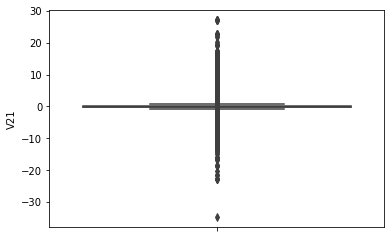

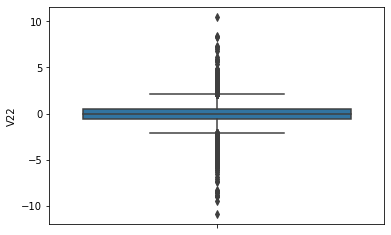

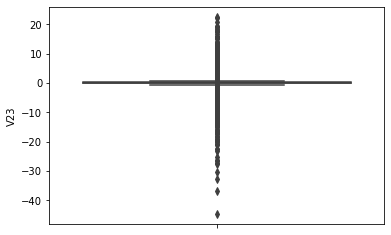

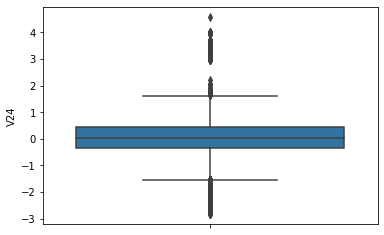

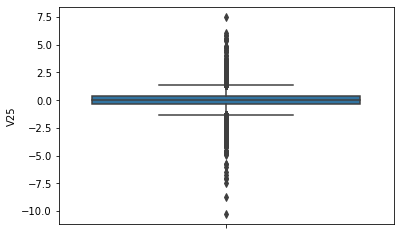

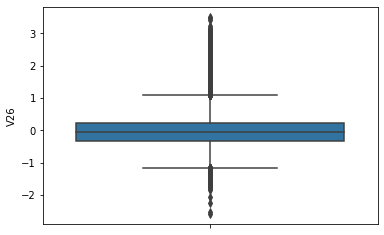

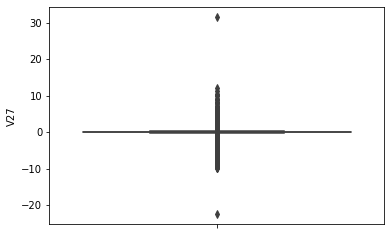

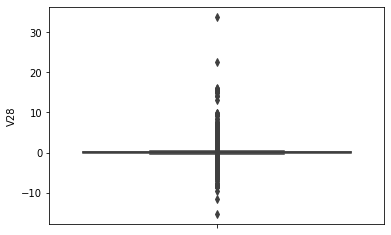

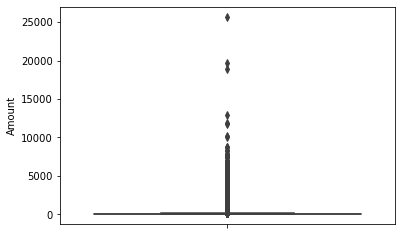

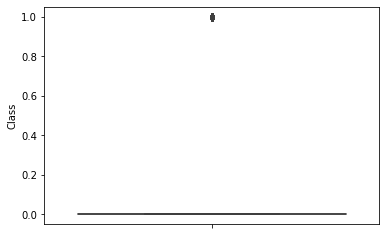

In [14]:
# Boxplots for finding outliers
for variable in cc_transactions.columns:
    sns.boxplot(data=cc_transactions, y=variable)
    plt.show()

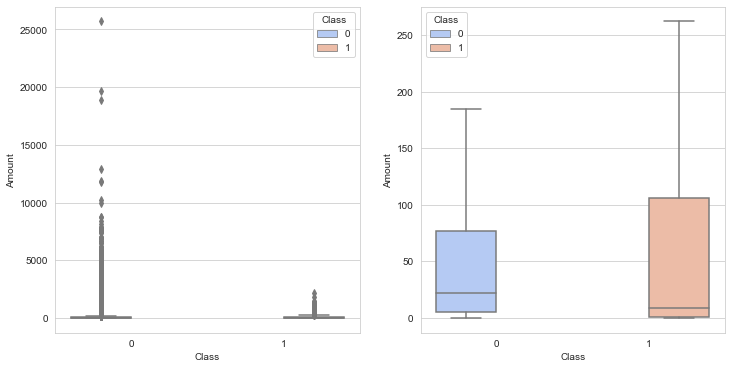

In [16]:
# Boxplot of Amount vs Class
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=cc_transactions, palette="coolwarm",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=cc_transactions, palette="coolwarm",showfliers=False)
plt.show();

/Users/nelly-ashleynyarko/opt/anaconda3/envs/master_thesis/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

/Users/nelly-ashleynyarko/opt/anaconda3/envs/master_thesis/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

/Users/nelly-ashleynyarko/opt/anaconda3/envs/master_thesis/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.

/Users/nelly-ashleynyarko/opt/anaconda3/envs/master_thesis/lib/python3.9/site-package

<Figure size 432x288 with 0 Axes>

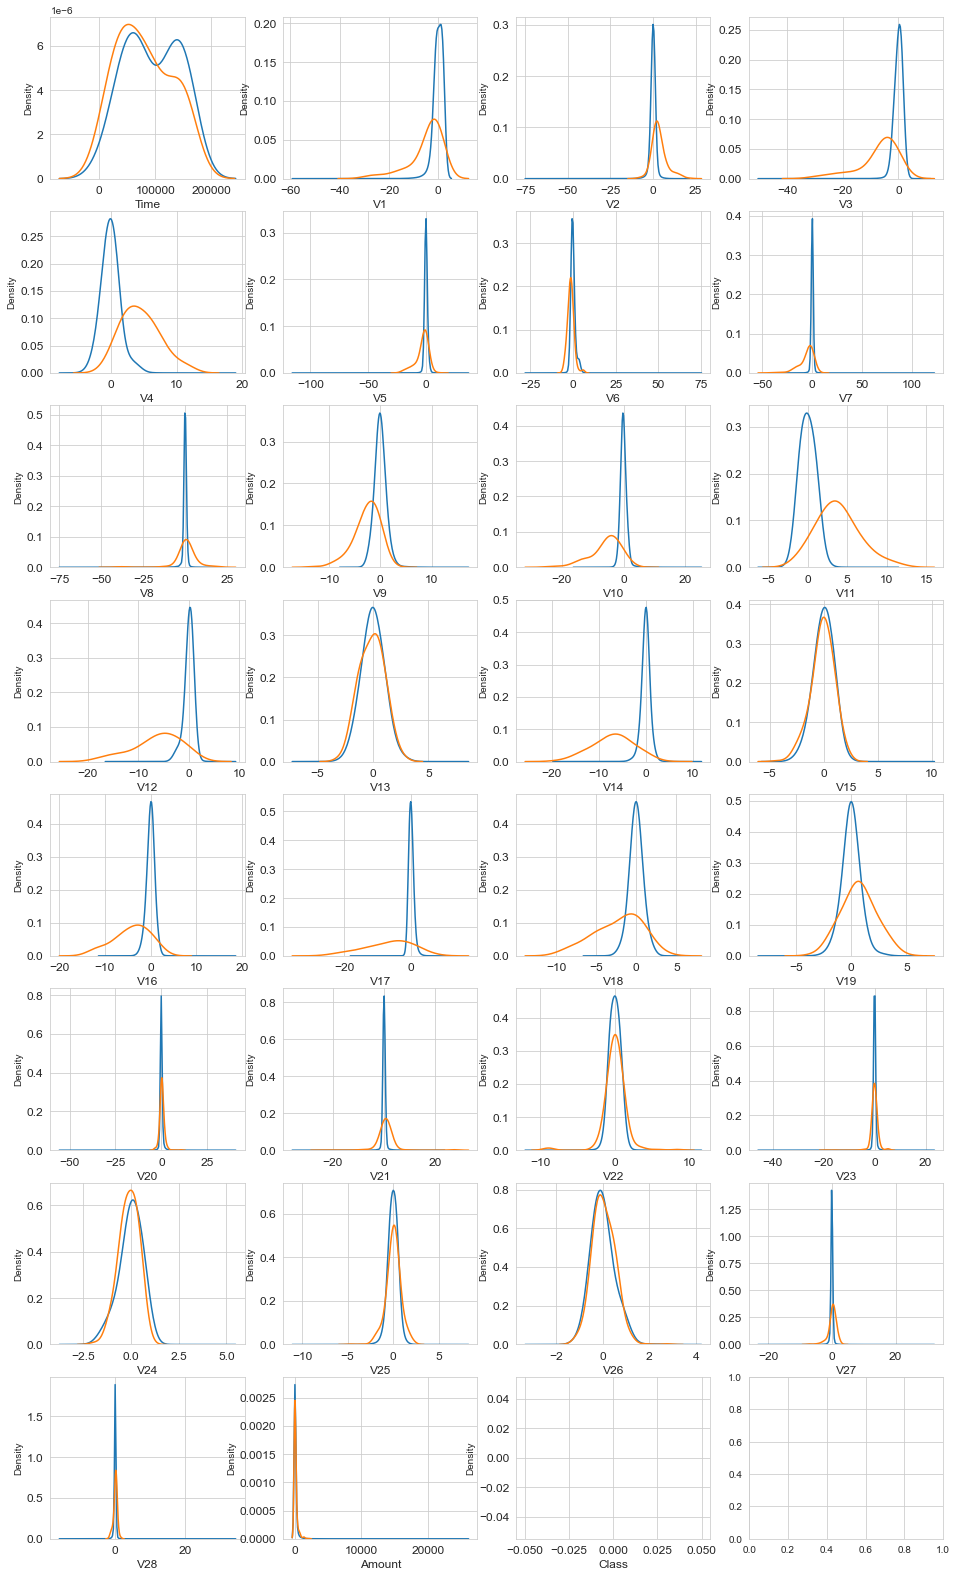

In [17]:
var = cc_transactions.columns.values

i = 0
non_fraud = cc_transactions.loc[cc_transactions['Class'] == 0]
fraud = cc_transactions.loc[cc_transactions['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(non_fraud[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(fraud[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

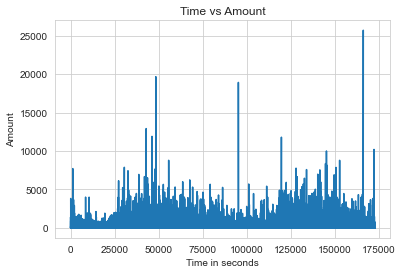

In [20]:
plt.plot(cc_transactions['Time'],cc_transactions['Amount'])
plt.title('Time vs Amount')
plt.xlabel('Time in seconds')
plt.ylabel('Amount')
plt.show()

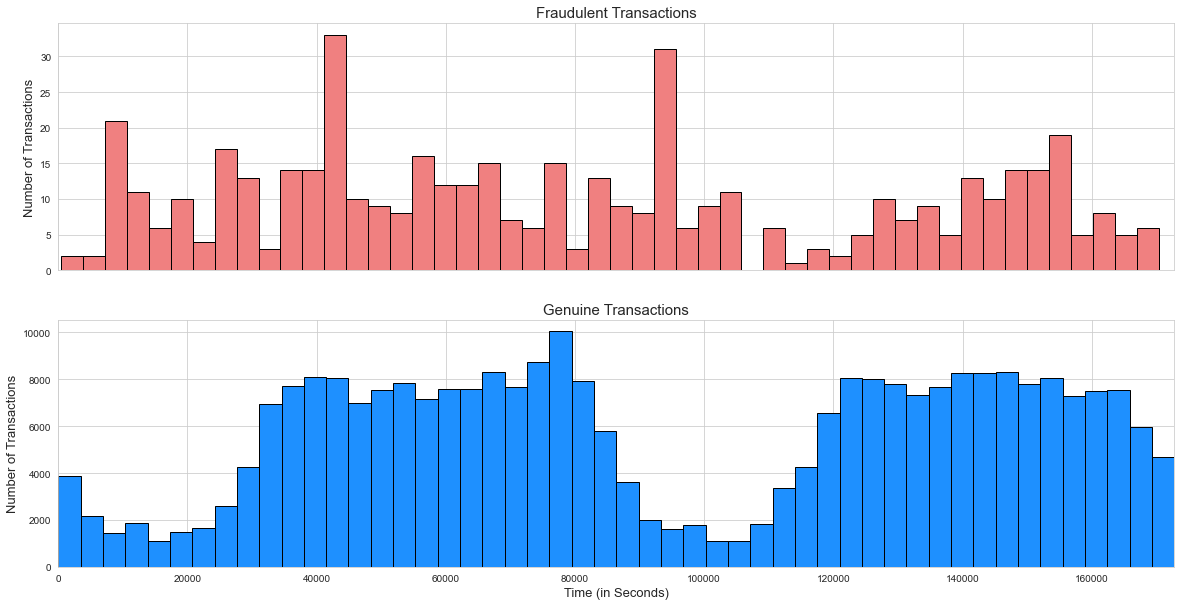

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

fraud_transactions = cc_transactions.Time[cc_transactions.Class == 1]
normal_transactions = cc_transactions.Time[cc_transactions.Class == 0]

ax1.hist(fraud_transactions, bins = 50, color='lightcoral', edgecolor="black")
ax1.set_xlim([min(fraud_transactions), max(fraud_transactions)])
ax1.set_title('Fraudulent Transactions', fontsize=15)
ax1.set_ylabel("Number of Transactions",  fontsize=13)

ax2.hist(normal_transactions, bins = 50, color ='dodgerblue', edgecolor="black")
ax2.set_xlim([min(normal_transactions), max(normal_transactions)])
ax2.set_title('Genuine Transactions',  fontsize=15)

ax2.set_xlabel('Time (in Seconds)',  fontsize=13)
ax2.set_ylabel('Number of Transactions',  fontsize=13)

plt.show()

/Users/nelly-ashleynyarko/opt/anaconda3/envs/master_thesis/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/nelly-ashleynyarko/opt/anaconda3/envs/master_thesis/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/nelly-ashleynyarko/opt/anaconda3/envs/master_thesis/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-le

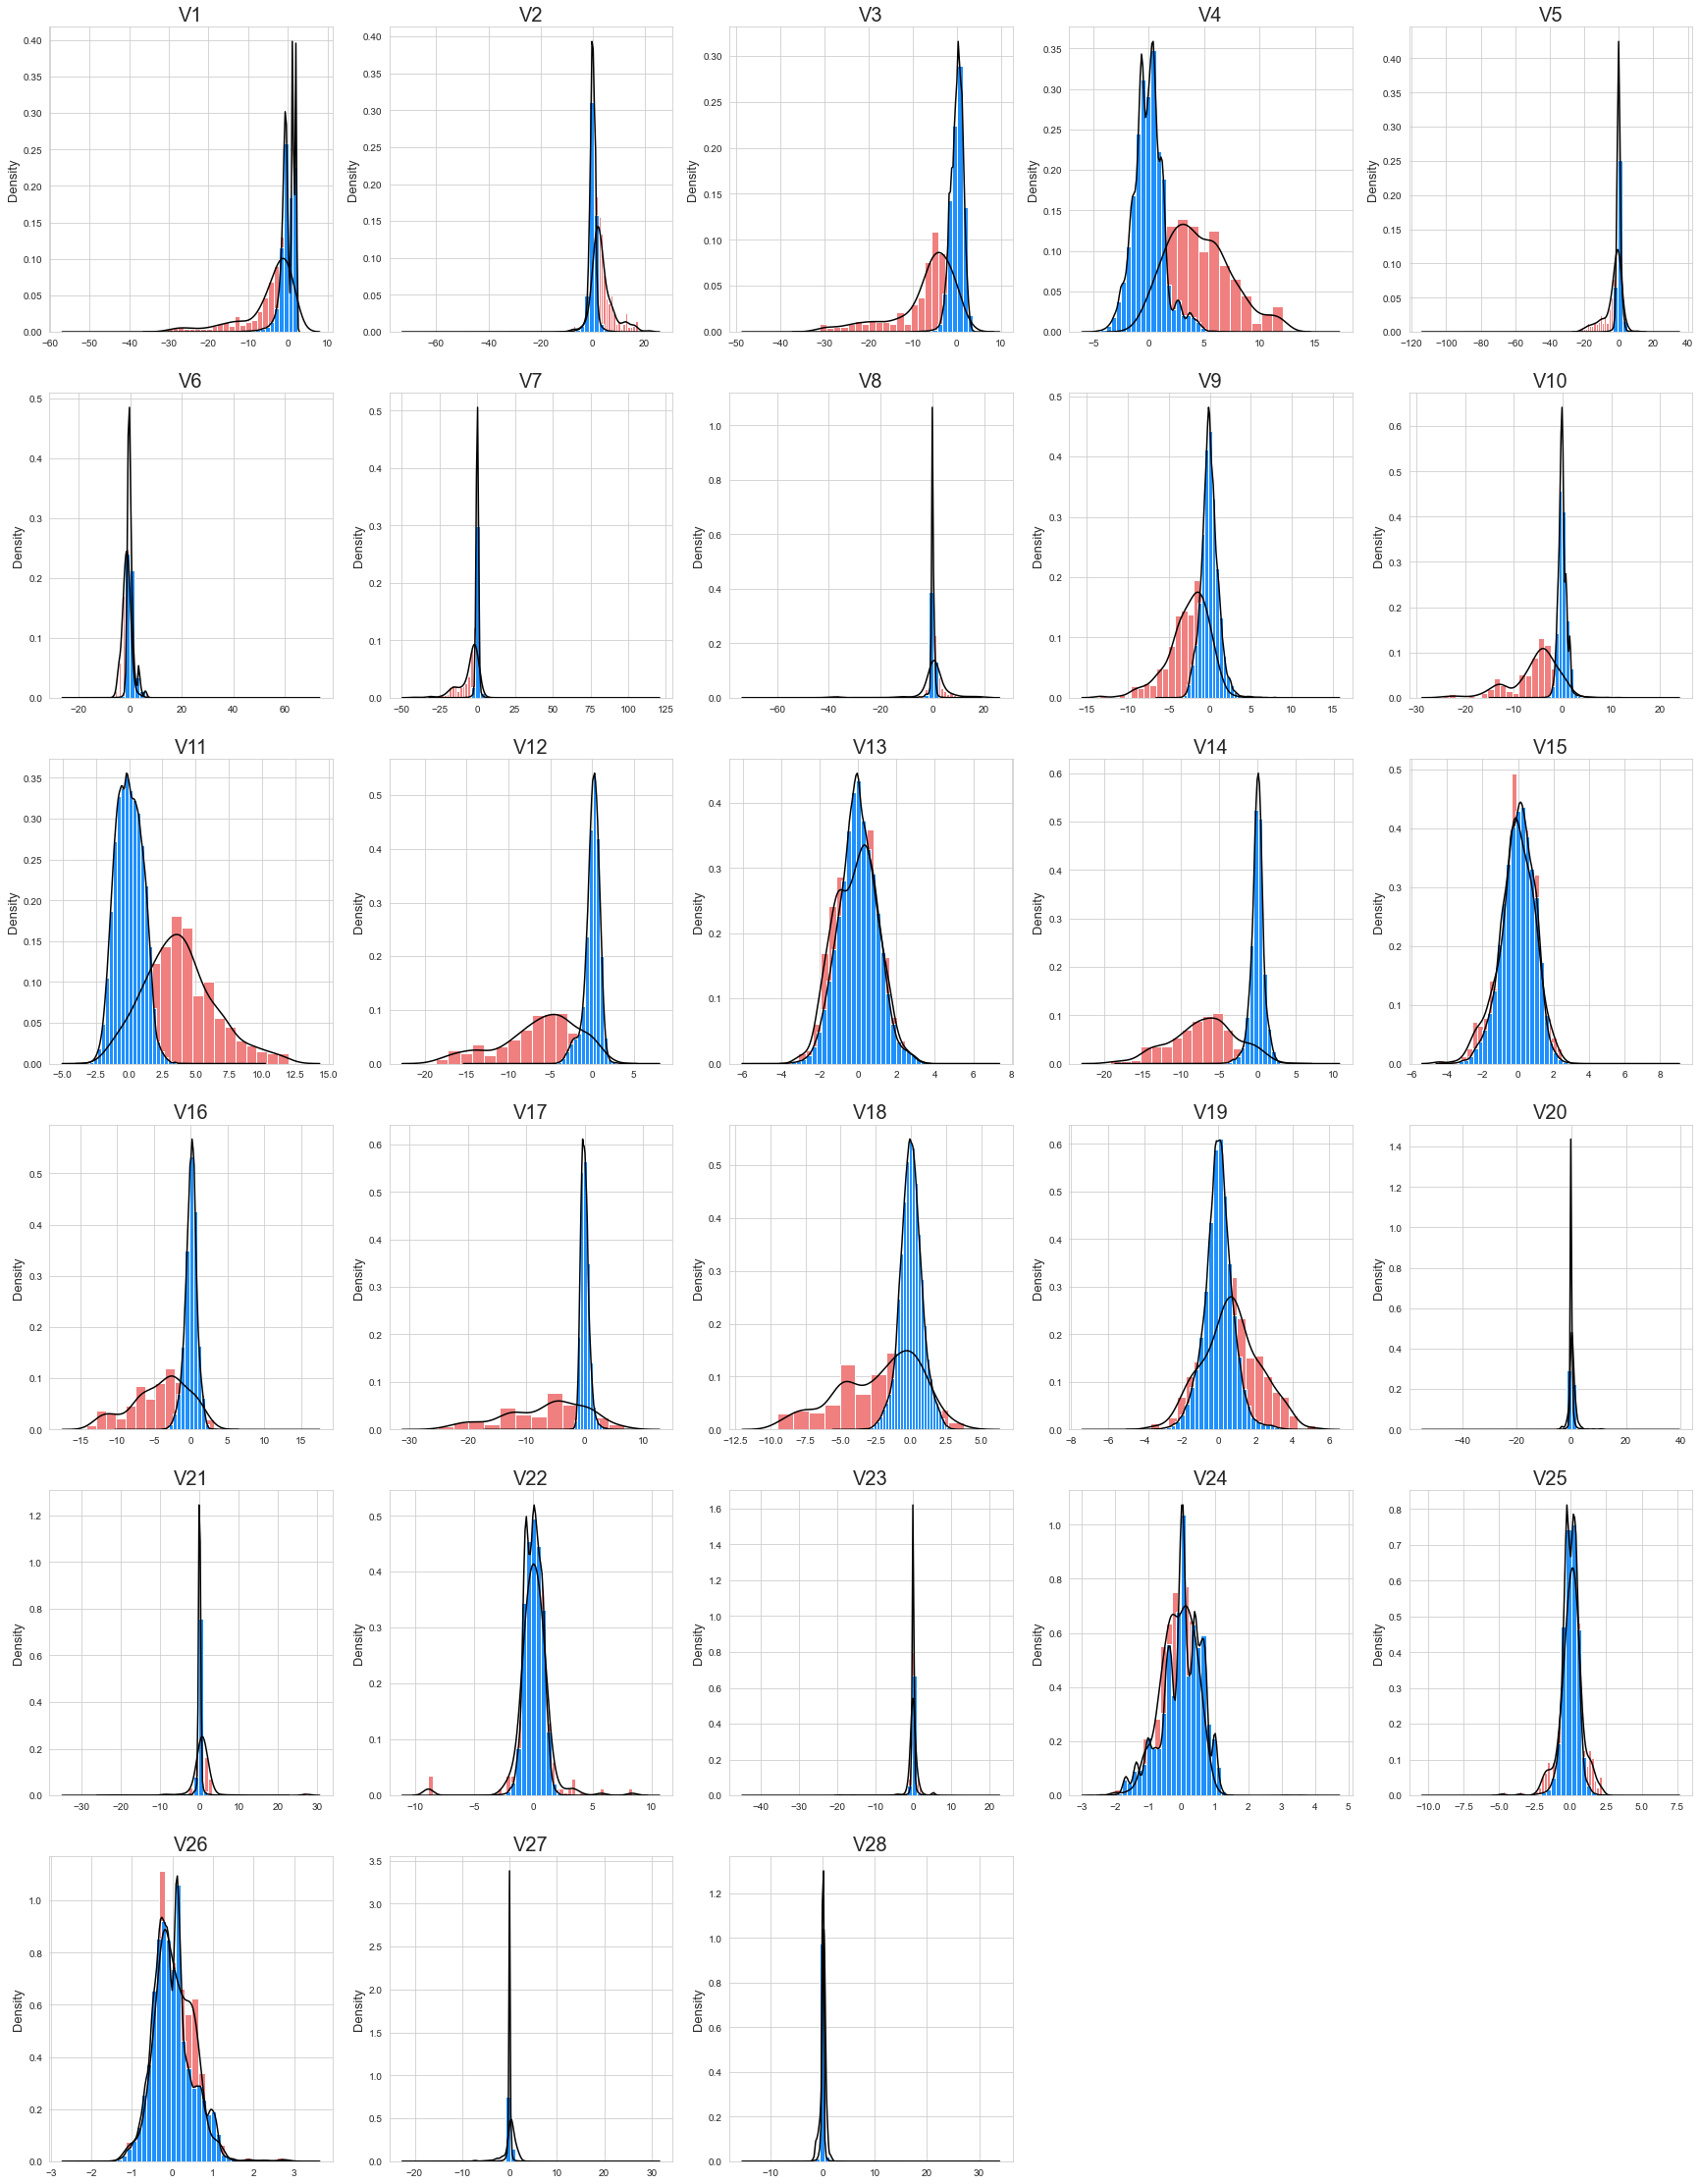

In [34]:
#Looking the V's features
columns = cc_transactions.iloc[:,1:29].columns

frauds = cc_transactions.Class == 1
normals = cc_transactions.Class == 0

grid = gridspec.GridSpec(6, 5)
plt.figure(figsize=(30,10*4))

for n, col in enumerate(cc_transactions[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(cc_transactions[col][frauds], color='lightcoral', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
    sns.distplot(cc_transactions[col][normals],color='dodgerblue', kde_kws={"color": "k", "lw": 1.5},  hist_kws=dict(alpha=1))
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
plt.show()